Created by Brandon Lay
asdftoger@gmail.com


This program will use complex vector equations for plotting, using the Freudenstein equation to calculate angles. 
The fourbar linkage is a DOF = 1 mechanism. 
The mechanism must satisfy grashoff conditions, with the input link able to rotate 360degress freely
It will also plot the path of a follower mechanism


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cmath

CHANGE ME!!!!!

abcd are linkage lengths

Angle refers to the follower

Angle_cg refers to follower centre of gravity

In [2]:

a,b,c,d = 150,350,280,400
assert(b + c >= d + a)


#Change follower parameters
#Degrees
Angle = 40
Angle_cg = Angle-20

#Relative magnitude, NOT ABSOLUTE LENGTH
Len = 0.5
Len_cg = 0.6


In [3]:
ROTATION = 'cw'
MODE = 'open'
#Lengths of the linkages, 
#a,b,c,d represent linkages starting from left fixed and going clockwise
#makes sure that the grashoff condition is satisfied
#Since linkage a is the driving linkage, b+c must be greater than a+d



#the angle that the linkages make wrt xaxis of the fixed points a,d
#step controls how fast the linkage drives
step = 0.01
if ROTATION == 'cw':
    th_a = np.arange(2*np.pi,0,-step*np.pi)
else:
    th_a = np.arange(0,2*np.pi,step*np.pi)

#Degrees, used for drawing arcs
th_a_d = th_a * 180/np.pi

In [4]:
#Freudenstein equation

K1 = d/a
K2 = d/c
K3 = (a**2-b**2+c**2+d**2)/(2*a*c)
A = np.cos(th_a) - K1 - K2*np.cos(th_a) + K3
B = -2*np.sin(th_a)
C = K1 - (K2+1)*np.cos(th_a) + K3

#Grashoff condition
disc = (B**2)-4*A*C 

#Checks if the four_bar linkage is grashoff
assert( np.greater_equal(disc,0).all())

In [5]:
if MODE =='open':
    th_c = 2*np.arctan((-B - np.sqrt(disc) )/(2*A))
else:
    th_c = 2*np.arctan((-B + np.sqrt(disc) )/(2*A))
    

#Degrees, used for drawing arcs
th_c_d = th_c * 180/np.pi

In [6]:
th_d = -np.pi*np.ones(len(th_c))

In [7]:
phase1 = [cmath.exp(1j*i) for i in th_a]
phase3 = [cmath.exp(1j*i) for i in th_c]
phase4 = [cmath.exp(1j*i) for i in th_d]

In [8]:
R1 = a*np.array(phase1)
R3 = c*np.array(phase3)
R4 = -d*np.array(phase4)

In [9]:
x1,y1 = np.zeros(len(R1)),np.zeros(len(R1))
x2,y2 = np.real(R1),np.imag(R1)
x3,y3 = np.real(R3+R4),np.imag(R3+R4)
x4,y4 = np.real(R4),np.imag(R4) 


In [10]:
th_b = np.arctan2((y3-y2),(x3-x2))
# th_b = (th_b + 2*np.pi ) % 2*np.pi

phase2 = [cmath.exp(1j*i) for i in th_b]
R2 = b*np.array(phase2)




'''
This is to sketch a follower(F)
'''

'''
plt.plot(x1,y1)
plt.plot(x3,y3)
for num in range(5,10):
    f_d = 45*np.pi/180*np.ones(len(th_a))
    f = 0.1*num*b
    phasef = [cmath.exp(1j*i) for i in f_d]
    Rf = R1+ f*(np.array(phasef)+np.array(phase2))
    xf,yf = np.real(Rf),np.imag(Rf)

    _=plt.plot(xf,yf)
'''

In [11]:

#Creating angle of the follower wrt ground

f_d = Angle*np.pi/180*np.ones(len(th_a))
f_d += th_b

f_dCG = Angle_cg*np.pi/180*np.ones(len(th_a))
f_dCG += th_b
#Follower size
f = Len*b
fCG = Len_cg*b


In [12]:
#Phase of follower 
phasef = [cmath.exp(1j*i) for i in f_d]
Rf = R1+ f*(np.array(phasef))
xf,yf = np.real(Rf),np.imag(Rf)

#Phase of follower centre of gravity
phasef_CG = [cmath.exp(1j*i) for i in f_dCG]
Rf_CG = R1+ fCG*(np.array(phasef_CG))
xfg,yfg = np.real(Rf_CG),np.imag(Rf_CG)

In [13]:
# #Plot all angles
# l1, = plt.plot(th_a, label = 'tha')
# l2, = plt.plot(th_b, label = 'thb')
# l3, = plt.plot(th_c, label = 'thc')
# l4, = plt.plot(th_d, label = 'thd')
# l5, = plt.plot(f_d, label = 'fd',c = 'k')
# _ = plt.legend(handles=[l1,l2,l3,l4,l5])
# _ = plt.show()

Animation magic!

In [14]:
temp = x1,x2,x3,x4
xmin = np.amin([np.amin(mini) for mini in temp])
xmax = np.amax([np.amax(mini) for mini in temp])
temp = y1,y2,y3,y4
ymin = np.amin([np.amin(mini) for mini in temp])
ymax = np.amax([np.amax(mini) for mini in temp])
#xmin,xmax

fig = plt.figure()
fig.set_size_inches(6,6,True)
plt.axis('off')

bord = 100 #give the animation an offset

ax = fig.add_subplot(111, autoscale_on=True,
                     xlim=(xmin-bord, xmax+bord), ylim=(ymin-bord, ymax+bord))

ax.grid()

In [15]:
from IPython.display import HTML

import matplotlib.animation as animation

In [16]:
line, = ax.plot([], [], marker = 'o',c = 'k',lw = 6,ms = 10)
line2, = ax.plot([], [], marker = 'o',c = 'b',lw = 6,ms = 4)
line3, = ax.plot([], [], marker = 'x',c = 'g',lw = 5,ms = 20)
#Plotting follower CG path
ax.plot(xfg,yfg)


def init():
    line.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    return line,line2,line3,

def animate(i):
    thisx = [x1[i],x2[i],x3[i],x4[i]]
    thisy = [y1[i],y2[i],y3[i],y4[i]]
    line.set_data(thisx,thisy)
    thisx = [x2[i],xf[i],x3[i]]
    thisy = [y2[i],yf[i],y3[i]]
    line2.set_data(thisx,thisy)
    thisx = [x2[i],xfg[i]]
    thisy = [y2[i],yfg[i]]
    line3.set_data(thisx,thisy)
    return line,line2,line3,

In [17]:
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y2)),
                              interval=30, blit=True, init_func=init)

HTML(ani.to_html5_video())


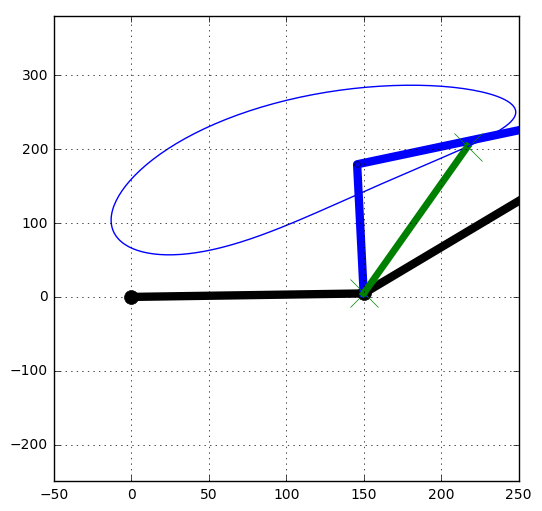

In [18]:
_ = plt.show()